In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.layers import Dense,MaxPool2D, Conv2D,Dropout,Flatten
from keras.models import Sequential
from urllib import request as req
from tensorflow.keras.utils import to_categorical
from keras.models import load_model

C:\Users\vishu\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
face_cascade=cv2.CascadeClassifier(r"C:\Users\vishu\Downloads\haarcascade_frontalface_default.xml")

In [3]:
classes_dict={
    0:'angry',
    1:'disgusted',
    2:'fearful',
    3:'happy',
    4:'neutral',
    5:'sad',
    6:'surprised'
}

In [4]:
num=7
data=[]
labels=[]
cur_path=r"C:\Users\vishu\Downloads\archive(6)"
for i in range(num):
    new_path=os.path.join(cur_path,'train',classes_dict[i])
    images_dir=os.listdir(new_path)
#     images_dir=images_dir[:436]
    for x in images_dir:
        
            image_path=os.path.join(new_path,x)
            train_img=Image.open(image_path).convert('RGB')
            train_img=train_img.resize((48,48))
            train_img=np.array(train_img)
            image=np.array(train_img)
            data.append(image)
            labels.append(i)

In [5]:
len(data)

28709

In [6]:
labels=to_categorical(labels)

In [7]:
data=np.array(data)
labels=np.array(labels)

In [8]:
data=data/255

In [9]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)

In [28]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),input_shape=x_train.shape[1:],activation='relu'))
# # model.add(tf.keras.layers.BatchNormalization())
# model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
# model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPool2D((2,2)))
#model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
#model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
#model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
#model.add(Dense(256,activation='relu'))
model.add(Dense(7,activation='softmax'))

In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
history=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
359/359 [==============================] - ETA: 0s - loss: 1.9138 - accuracy: 0.2363WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002505818F510> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

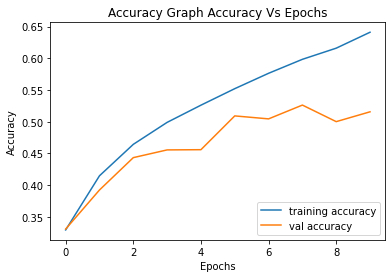

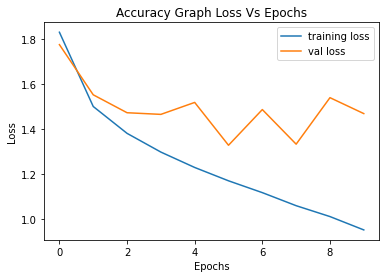

In [13]:
plt.figure(0)
plt.plot(history.history['accuracy'],label="training accuracy")
plt.plot(history.history['val_accuracy'],label="val accuracy")
plt.title("Accuracy Graph Accuracy Vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()
plt.figure(1)
plt.plot(history.history['loss'],label="training loss")
plt.plot(history.history['val_loss'],label="val loss")
plt.title("Accuracy Graph Loss Vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

In [14]:
model.save('emotion_detection.h5')

In [4]:
model=load_model('emotion_detection.h5')

In [33]:
vid = cv2.VideoCapture(0)

while(True):
    ret, frame = vid.read()
    faces = face_cascade.detectMultiScale(frame, 1.3, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 4)
        train_img=frame[x:x+w,y:y+h]
        train_img=Image.fromarray(train_img)
        train_img=train_img.resize((48,48))
        train_img=np.array(train_img)
        train_img=train_img/255
        score=model.predict(np.expand_dims(train_img,0))

        cv2.putText(frame,classes_dict[np.argmax(score)], (int((y+h)/2),int((x+w)/2) ), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255))
    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

vid.release()
cv2.destroyAllWindows()


happy
happy
happy
happy
disgusted
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
sad
sad
happy
happy
happy
happy
fearful
happy
fearful
sad
sad
happy
happy
happy
happy
happy
happy
fearful
sad
fearful
fearful
happy
sad
happy
happy
happy
happy
happy
happy
happy
happy
happy
fearful
fearful
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
fearful
fearful
happy
happy
happy
happy
happy
happy
happy
fearful
happy
happy
fearful
happy
happy
happy
happy
happy
fearful
happy
happy
happy
happy
happy
surprised
happy
sad
sad
sad
sad
sad


In [12]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [19]:
## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=x_train.shape[1:])
base_model.trainable = False ## Not trainable weights

## Preprocessing input
train_ds = preprocess_input(x_train) 
test_ds = preprocess_input(x_test)

In [20]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(7, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model.fit(train_ds, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es],validation_data=(x_test,y_test))

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


ValueError: Shapes (None, 7) and (None, 3) are incompatible

In [17]:
x_train.shape

(22967, 48, 48, 3)

In [18]:
train_ds.shape

(22967, 48, 48, 3)